In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from google.colab import drive

data_dir = '/content/drive/MyDrive/Colab Notebooks/data'

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(224, 224),
    validation_split=0.2,
    subset="training",
    seed=123,
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(224, 224),
    validation_split=0.2,
    subset="validation",
    seed=123,
    batch_size=32
)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

model = tf.keras.Sequential([
    layers.Rescaling(1./127.5, offset=-1),

    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),

    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Found 2327 files belonging to 5 classes.
Using 1862 files for training.
Found 2327 files belonging to 5 classes.
Using 465 files for validation.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 241s 4s/step - accuracy: 0.6391 - loss: 0.9504 - val_accuracy: 0.9892 - val_loss: 0.0764
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - accuracy: 0.9669 - loss: 0.1344 - val_accuracy: 0.9935 - val_loss: 0.0399
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - accuracy: 0.9640 - loss: 0.1054 - val_accuracy: 0.9957 - val_loss: 0.0305
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - accuracy: 0.9729 - loss: 0.0880 - val_accuracy: 0.9957 - val_loss: 0.0258
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - accuracy: 0.9833 - loss: 0.0567 - val_accuracy: 0.9957 - val_loss: 0.0242
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 12s 160ms/step - accuracy: 0.9838 - loss: 0.0558 - val_accuracy: 0.9957 - val_loss: 0.0200
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
I am 40.46% sure this is a African Elephant!


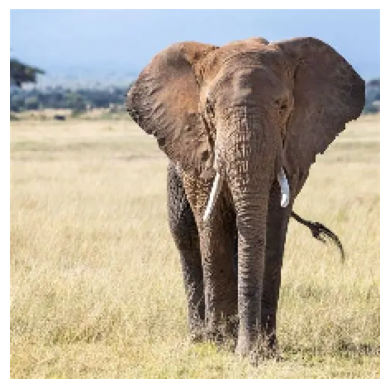

In [3]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt

def test_image(image_path):
    try:
        img = load_img(image_path, target_size=(224, 224))

        img_array = img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)

        predictions = model.predict(img_array)
        score = tf.nn.softmax(predictions[0])

        class_names = train_ds.class_names
        winner = class_names[np.argmax(score)]
        confidence = 100 * np.max(score)

        print(f"I am {confidence:.2f}% sure this is a {winner}!")
        plt.imshow(img)
        plt.axis('off')
        plt.show()

    except Exception as e:
        print("Error! Check the file path. Did you upload it to the Files sidebar?")
test_image('/content/test_image.jpg.webp')